In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
cancer_data = sklearn.datasets.load_breast_cancer()
# Most datasets from sklearn.datasets return a Bunch object. A Bunch object is a dictionary-like structure with attributes 
# instead of key-value pairs. You can access data using dot notation (data.key) or dictionary notation (data['key']). So it's
# not a dataframe thats why we can't use pandas functions on it such as .head().
"""
Attribute	Description:
data	Features (NumPy array)
target	Labels (NumPy array)
feature_names	Column names (list)
target_names	Target class names (list)
DESCR	Dataset description (string)
"""

print(cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

## Converting the bunch of objects into pandas Dataframe:

In [3]:
data = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
# pd.DataFrame(...) → Converts the NumPy array into a Pandas DataFrame, using feature_names as column names, .data contains the
# main dataset (a NumPy array) containing feature values, .feature_names contains a list of column names corresponding to the 
# features. If you want to include all the data (features, target, and additional metadata) into a Pandas DataFrame, you need to
# manually add them, since sklearn.datasets.load_*() returns a Bunch object where data and target are stored separately.

data['target'] = cancer_data.target

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In target column the values indicate:

0 → Malignant (Cancerous) cells 🛑 (Bad, harmful, needs treatment)

1 → Benign (Non-cancerous) cells ✅ (Not harmful, usually safe)

In [4]:
data.shape

(569, 31)

This tells there are total 569 rows, which means that there are 569 different patient's data who are classified as 0(Malignant) or 1(Benign). And there are 31 columns, means that there are 31 features for each patient.

### Checking data distribution in target column:

In [5]:
data['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

We can see that there is imbalancement of the data, as 357 values are Benign and only 212 datapoints are available for Malignant in the dataset.

## Creating i/p & o/p variables, and Splitting the dataset:

In [6]:
x = data.drop(columns='target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


## Standardizing the data:

Scaling a dataset is the process of transforming numerical features so they have a common range or distribution. This helps machine learning models 
interpret and process data more effectively by preventing certain features from dominating due to larger values.
    
1️⃣ Ensures All Features Have the Same Scale: In a dataset, features (columns) can have different scales.
Example: Age: 20 to 70, Salary: 10,000 to 100,000, and House Price: 5,00,000 to 50,00,000. If we don’t scale them, models give more importance to larger values (like house prices) than smaller ones (like age). Scaling prevents this imbalance and ensures all features contribute equally.

2️⃣ Helps Gradient Descent Converge Faster: Many ML models (especially Neural Networks, Logistic Regression, and SVMs) use gradient descent for optimization. If features have very different scales, gradient descent may take longer to converge. Standardization helps speed up learning.

3️⃣ Improves Model Performance: Many ML algorithms perform better(Better accuracy and stability in model training) when data is standardized, such as Logistic Regression, Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), Neural Networks, Principal Component Analysis (PCA). 

4️⃣ Avoids Bias Towards Larger Values: Models calculate distances (e.g., Euclidean distance in k-NN, clustering). If one feature has much larger values than another, it dominates distance calculations. Scaling ensures fair distance computation.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                   # Create a scaler object

x_train_std = scaler.fit_transform(x_train)                 # Fit on training data and transform

x_test_std = scaler.transform(x_test)                       # Only transform test data

In training dataset, we use .fit_transform() as: fit() computes the mean and standard deviation of x_train, and the .transform() computes values to standardize x_train.

In testing dataset, we use .transform cause if we use fit_transform(x_test), it will calculate new mean & std from x_test, which is wrong.The test data must be transformed the same way as training data to ensure consistency, so we just use .transform().

Also here we don't need to transform the o/p (y_train, and y_test), because it is already scaled all the values are either 0 or 1.

#### **Difference Between Scaling and Standardizing:**

##### **Scaling (Min-Max Scaling):**
- Rescales features to a fixed range (usually [0,1] or [-1,1]).
- **Formula:**
  \[
  X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  \]
- **Example:** `MinMaxScaler()` in `sklearn.preprocessing`

##### **Standardizing (Z-score Normalization):**
- Transforms data to have **zero mean** and **unit variance**.
- **Formula:**
  \[
  X' = \frac{X - \mu}{\sigma}
  \]
- Here, **μ** is the mean, and **σ** is the standard deviation.
- **Example:** `StandardScaler()` (which you're using)

# BUILDING NEURAL NETWORK:

In [8]:
# Importing Tesorflow & Keras
import tensorflow as tf
from tensorflow import keras

TensorFlow is an open-source machine learning framework developed by Google Brain. It provides a flexible ecosystem for building and deploying machine learning and deep learning models. It supports a wide range of tasks, including numerical computation, neural networks, and large-scale machine learning applications.

Keras is a high-level deep learning API built on top of TensorFlow. It provides a simple and user-friendly way to build and train deep learning models.

In [9]:
tf.random.set_seed(3)
# tf.random.set_seed(3) sets the global random seed in TensorFlow to ensure reproducibility in operations involving randomness, such as weight 
# initialization, shuffling data, and generating random numbers.

### SETTING LAYERS OF THE NEURAL NETWORK OR CREATING STRUCTURE OF NEURAL NETWORK:

In [10]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (30,)),         # INPUT LAYER (Flatten)
                          keras.layers.Dense(20, activation = 'relu'),       # HIDDEN LAYER (Dense)
                          keras.layers.Dense(2, activation = 'sigmoid')      # OUTPUT LAYER (Dense)
])

C:\Users\HARSH\OneDrive\Documents\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


A Sequential model in Keras is a stack of layers arranged in order, where the output of one layer becomes the input of the next. It is used for building simple, feedforward neural networks where data flows one way from input to output.

Neural networks are built using different types of layers, each serving a specific purpose. Two commonly used layers in Keras are:

Flatten Layer (keras.layers.Flatten): It converts multi-dimensional input (like nd arrays for images) into a 1D array so that the next layers can process it easily. Here our i/p layer is Flatten cause we have 30 features as i/p and we want to convert it into a single array. Single array cause Dense layer expacts 1D i/p.

Dense Layer (keras.layers.Dense): It is a fully connected layer that applies mathematical operations (weights, biases, activation functions) to learn patterns. 

Hidden layer: This is a fully connected (Dense) layer with 20 neurons. Each neuron learns patterns from the 30 input features.
Uses ReLU (Rectified Linear Unit) activation to introduce non-linearity and improve learning. ReLU removes negative values (replaces them with 0).
Helps the model learn faster and avoid the "vanishing gradient" problem. Formula: ReLU(x)=max(0,x)

Output layer: This is the final output layer with 2 neurons, here we used 2 neurons cause we have only 2 o/p (Benign & Malignant). Uses Sigmoid activation to produce output values between 0 and 1, representing probabilities.

### COMPILING THE MODEL:

In [11]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )

This code compiles the neural network model by specifying:

Optimizer: Tells how the model learns, here we use adam; Adaptive Moment Estimation which is a popular optimizer that adjusts learning rates dynamically.

Loss function: Tells what the model is trying to minimize, here we use space_categorical_crossentropy. This loss function is used for multi-class classification where labels are integers (0, 1, 2, ...) instead of one-hot encoded vectors, it measures how well the model’s predictions match the true labels and minimizes the error during training.

Metrics: Tells what performance we are measuring, here we use accuracy which calculates the percentage of correctly classified samples.

# TRAINING THE NEURAL NETWORK:

In [12]:
model.fit(x_train, y_train, validation_split=0.1, epochs=10)
# validation_split=0.1 – Reserves 10% for Validation; 10% of the training data is set aside for validation. The model trains on 90% of x_train and 
# checks its performance on the remaining 10%.
# epochs=10 – Number of Training Cycles; The model sees the entire training dataset 10 times during training. Each pass through the dataset is called an
# epoch. More epochs → Better learning (up to a limit, after which it may overfit).

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6500 - loss: 406.7565 - val_accuracy: 0.6522 - val_loss: 307.9324
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6500 - loss: 317.1017 - val_accuracy: 0.6522 - val_loss: 229.3985
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6500 - loss: 232.1327 - val_accuracy: 0.6522 - val_loss: 153.9686
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6500 - loss: 150.3652 - val_accuracy: 0.6522 - val_loss: 80.6922
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6547 - loss: 70.8912 - val_accuracy: 0.6957 - val_loss: 13.6078
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7207 - loss: 9.1217 - val_accuracy: 0.4783 - val_loss: 9.2951
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4397 - loss: 9.2872 - val_accuracy: 0.7609 - val_loss: 2.4963
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7279 - loss: 4.8310 - val_acc

In [13]:
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8326 - loss: 0.3630 - val_accuracy: 0.9130 - val_loss: 0.2409
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8767 - loss: 0.2571 - val_accuracy: 0.9565 - val_loss: 0.1885
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9315 - loss: 0.1909 - val_accuracy: 0.9783 - val_loss: 0.1565
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9355 - loss: 0.1548 - val_accuracy: 0.9783 - val_loss: 0.1368
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9560 - loss: 0.1330 - val_accuracy: 0.9783 - val_loss: 0.1240
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9626 - loss: 0.1183 - val_accuracy: 0.9783 - val_loss: 0.1150
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9648 - loss: 0.1074 - val_accuracy: 0.9783 - val_loss: 0.1083
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9760 - loss: 0.0989 - val_accuracy: 0.9783 - v

#### Here you can see the difference b/w normal dataset & standardized dataset:
You can compare the values for accuracy, loss, val_accuracy, val_loss; all of them are better when we have trained on the scaled dataset, then the normal one.

## MODEL VISUALIZATION:

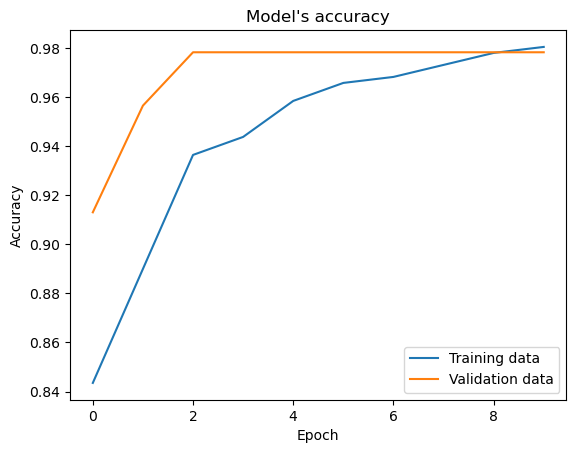

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model\'s accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training data', 'Validation data'], loc = 'lower right')

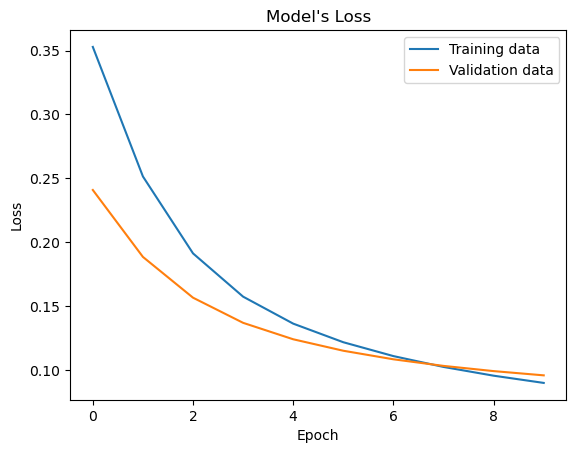

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model\'s Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training data', 'Validation data'], loc = 'upper right')

## MODEL EVALUATION ON TEST DATA:

In [16]:
loss, accuracy = model.evaluate(x_test_std, y_test)
# In deep learning (DL) models, the .evaluate() function both predicts and evaluates the results in one step. First, the model takes x_test_std as input
# and predicts the output. Then it compares the predicted values with the actual labels(y_test) using the loss function (e.g., categorical cross-entropy
# for classification, MSE for regression). It calculates accuracy (or other metrics) based on predictions and y_test.
# If multiple metrics were specified during model.compile(), evaluate() returns multiple values (e.g., loss, accuracy, precision, etc).

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9791 - loss: 0.0981


## PREDICTION ON TEST DATA:

In [17]:
y_pred = model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [18]:
print(x_test_std.shape)
print('The 1st data point in test data: \n', x_test_std[0])

(114, 30)
The 1st data point in test data: 
 [-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [19]:
print(y_pred.shape)
print('The 1st predictes value for the test data: \n', y_pred[0])

(114, 2)
The 1st predictes value for the test data: 
 [0.17988214 0.7299726 ]


Here we can see that unlike the Machine Learning model's prediction, this deep learning model predicts **two outputs**. This tells the probability of the **two classes**:  
- **Malignant class probability**  
- **Benign class probability**  

For example, if the output is:  0.11346108, and 0.632441


Then this means:  
- **Class 0 probability →** `0.113` (~11.3%)  
- **Class 1 probability →** `0.632` (~63.2%)  

Since `0.632` is higher, the model is predicting **Class 1 (Benign)**.

So, for each of the **114 different values** in the testing data, we will have **two different values** as the output, each representing the probability of **Class 0 or Class 1**.


In [20]:
# Working of .argmax() function, it return the index of the max. value in the list:
a = [10, 20, 49]
i = np.argmax(a)
print(a, i)

[10, 20, 49] 2


### Converting the predication probability to class labels:

In [21]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


## BUILDING THE PREDICTIVE SYSTEM:

In [22]:
# Taking the i/p:
input_data = (10.0, 15.2, 80.3, 50.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
              12.1, 20.2, 90.3, 60.1, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66,
              13.2, 25.3, 95.4, 70.2, 0.12, 0.24, 0.36, 0.48, 0.60, 0.72)

# Converting i/p data to numpy array:
np_input = np.asarray(input_data)

# Reshaping the numpy array:
reshape_input = np_input.reshape(1, -1)

# Standardizing the input data:
input_std = scaler.transform(reshape_input)

# Predicting the value:
input_pred = model.predict(input_std)
print(input_pred)

# Labeling the predicted value:
input_label = [np.argmax(input_pred)]
print(input_label)

# Printing the class:
if(input_label[0] == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[1.2537221e-06 1.0000000e+00]]
[1]
The tumor is Benign


C:\Users\HARSH\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
